In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
JPMORGAN = pd.read_csv(r"C:\Users\dell\Documents\Project files\JPMorgan.csv")

In [7]:
print(JPMORGAN.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  135.240005  136.740005  133.889999  135.119995  129.648499   
1  2023-01-04  135.990005  137.679993  135.570007  136.380005  130.857483   
2  2023-01-05  135.660004  135.710007  133.699997  135.350006  130.828491   
3  2023-01-06  136.130005  138.380005  134.490005  137.940002  133.331955   
4  2023-01-09  138.600006  138.880005  136.880005  137.369995  132.781006   

     Volume  
0  11054800  
1  11687600  
2   8381300  
3  10029100  
4   8482300  


In [8]:
nvidia = pd.read_csv(r"C:\Users\dell\Documents\Project files\nvidia.csv")
print(nvidia.head())

         Date    Open    High     Low   Close     Volume  Adj Close
0  2023-01-03  14.851  14.996  14.096  14.315  401277000  14.305581
1  2023-01-04  14.567  14.853  14.241  14.749  431324000  14.739295
2  2023-01-05  14.491  14.564  14.148  14.265  389168000  14.255614
3  2023-01-06  14.474  15.010  14.034  14.859  405044000  14.849225
4  2023-01-09  15.284  16.056  15.141  15.628  504231000  15.617719


In [9]:
JPMORGAN['Date'] = pd.to_datetime(JPMORGAN['Date'])
nvidia['Date'] = pd.to_datetime(nvidia['Date'])

JPMORGAN.set_index('Date', inplace=True)
nvidia.set_index('Date', inplace=True)

In [10]:
JPMORGAN = JPMORGAN[['Close']].rename(columns={'Close': 'JPMORGAN'})
nvidia = nvidia[['Close']].rename(columns={'Close': 'nvidia'})

In [11]:
prices = pd.merge(JPMORGAN, nvidia, left_index=True, right_index=True, how='inner')
print(prices.head())

              JPMORGAN  nvidia
Date                          
2023-01-03  135.119995  14.315
2023-01-04  136.380005  14.749
2023-01-05  135.350006  14.265
2023-01-06  137.940002  14.859
2023-01-09  137.369995  15.628


In [12]:
returns = prices.pct_change().dropna()
print(returns.head())

            JPMORGAN    nvidia
Date                          
2023-01-04  0.009325  0.030318
2023-01-05 -0.007552 -0.032816
2023-01-06  0.019136  0.041640
2023-01-09 -0.004132  0.051753
2023-01-10  0.008954  0.017981


In [13]:
print(prices.head())
print(prices.columns)

              JPMORGAN  nvidia
Date                          
2023-01-03  135.119995  14.315
2023-01-04  136.380005  14.749
2023-01-05  135.350006  14.265
2023-01-06  137.940002  14.859
2023-01-09  137.369995  15.628
Index(['JPMORGAN', 'nvidia'], dtype='object')


In [16]:
JPMORGAN_returns = returns['JPMORGAN']
nvidia_returns = returns['nvidia']

JPMORGAN_sorted = JPMORGAN_returns.sort_values()
nvidia_sorted = nvidia_returns.sort_values()

In [17]:
import numpy as np

JPMORGAN_var_5 = np.percentile(JPMORGAN_returns, 5)
nvidia_var_5 = np.percentile(nvidia_returns, 5)

print("JPMORGAN 5% VaR:", JPMORGAN_var_5)
print("nvidia 5% VaR:", nvidia_var_5)

JPMORGAN 5% VaR: -0.017537252717058683
nvidia 5% VaR: -0.03495454939800413


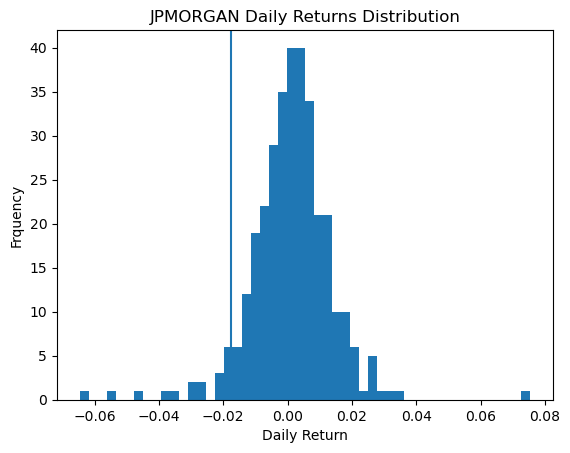

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(JPMORGAN_returns, bins=50)
plt.axvline(JPMORGAN_var_5)
plt.title("JPMORGAN Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frquency")
plt.show()

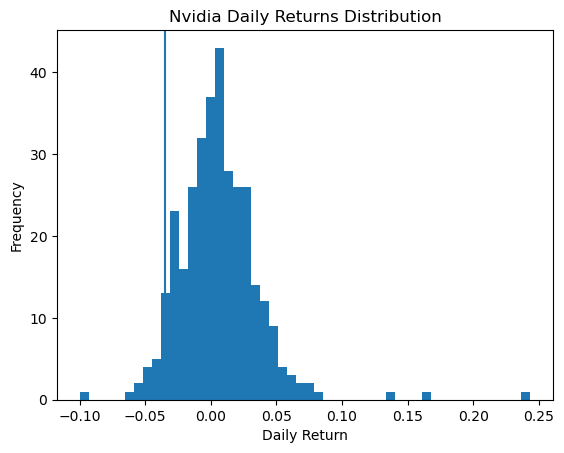

In [19]:
plt.figure()
plt.hist(nvidia_returns, bins=50)
plt.axvline(nvidia_var_5)
plt.title("Nvidia Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

In [22]:
weights = np.array([0.5, 0.5])

In [23]:
portfolio_returns = returns.dot(weights)
print(portfolio_returns.head())

Date
2023-01-04    0.019821
2023-01-05   -0.020184
2023-01-06    0.030388
2023-01-09    0.023810
2023-01-10    0.013467
dtype: float64


In [26]:
portfolio_sorted = portfolio_returns.sort_values()

In [28]:
portfolio_var_5 = np.percentile(portfolio_returns, 5)
print("Portfolio 5% VaR:", portfolio_var_5)

Portfolio 5% VaR: -0.0240037359348618


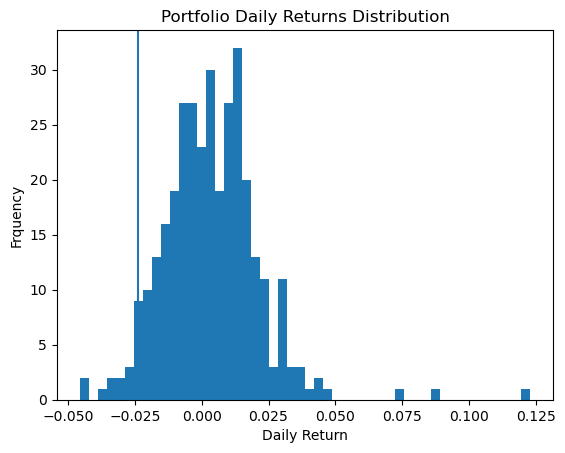

In [29]:
plt.figure()
plt.hist(portfolio_returns, bins=50)
plt.axvline(portfolio_var_5)
plt.title("Portfolio Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frquency")
plt.show()

In [30]:
print("JPMORGAN VaR:", JPMORGAN_var_5)
print("nvidia VaR:", nvidia_var_5)
print("portfolio VaR:", portfolio_var_5)

JPMORGAN VaR: -0.017537252717058683
nvidia VaR: -0.03495454939800413
portfolio VaR: -0.0240037359348618
